In [1]:
#in questo notebook faccio LMM e t-test (sia parametrico che non) per vedere l'impatto delle mie VI sulla VD = CoinsGainedPerTrial (i.e., numero di monete raccolte nel trial)

In [2]:
import json
import os
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import scipy.optimize as opt
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from copy import deepcopy

In [3]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd

In [4]:
data = pd.read_csv('out/results.csv')  # read data

In [5]:
import statsmodels
endog = data["CoinsGainedPerTrial"] # variabile dipendente - VisitedAreas si riferisce al numero di aree visitate dal soggetto in quel trial
exog = data[["LongBattery","RichEnvironment","FirstAreaRich"]] # variabili indipendenti


groups = data['Subject'] # nel modello lineare misto devo mettere il gruppo
model = statsmodels.regression.mixed_linear_model.MixedLM(endog, exog, groups)
result = model.fit()
print(result.summary())

formula = "CoinsGainedPerTrial ~  LongBattery * FirstAreaRich + LongBattery * RichEnvironment + RichEnvironment * FirstAreaRich" 


model = smf.mixedlm(formula, data=data, groups = data['Subject'])

result = model.fit()
print(result.summary())

              Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: CoinsGainedPerTrial
No. Observations: 1280    Method:             REML               
No. Groups:       32      Scale:              76.0891            
Min. group size:  40      Log-Likelihood:     -4687.8728         
Max. group size:  40      Converged:          Yes                
Mean group size:  40.0                                           
------------------------------------------------------------------
                  Coef.    Std.Err.    z     P>|z|  [0.025  0.975]
------------------------------------------------------------------
LongBattery        31.470     0.488  64.470  0.000  30.513  32.426
RichEnvironment     9.469     0.583  16.252  0.000   8.327  10.611
FirstAreaRich       1.881     0.690   2.727  0.006   0.529   3.232
Group Var        1091.004    31.912                               

                          Mixed Linear Model Regression Results
Model:            

In [6]:
condizione_19 = (data["LongBattery"] == True) & (data["RichEnvironment"] == True) & (data["FirstAreaRich"] == True)
data19 = data [condizione_19]

condizione_20 = (data["LongBattery"] == True) & (data["RichEnvironment"] == False) & (data["FirstAreaRich"] == True)
data20 = data [condizione_20]

condizione_21 = (data["LongBattery"] == False) & (data["RichEnvironment"] == True) & (data["FirstAreaRich"] == True)
data21 = data [condizione_21]

condizione_22 = (data["LongBattery"] == False) & (data["RichEnvironment"] == False) & (data["FirstAreaRich"] == True)
data22 = data [condizione_22]



coins_gained_per_trial_19 = data19["CoinsGainedPerTrial"] 
coins_gained_per_trial_19  = coins_gained_per_trial_19 .to_numpy() 

coins_gained_per_trial_20 = data20["CoinsGainedPerTrial"] 
coins_gained_per_trial_20 = coins_gained_per_trial_20.to_numpy() 

coins_gained_per_trial_21 = data21["CoinsGainedPerTrial"] 
coins_gained_per_trial_21 = coins_gained_per_trial_21.to_numpy()

coins_gained_per_trial_22 = data22["CoinsGainedPerTrial"]
coins_gained_per_trial_22 = coins_gained_per_trial_22.to_numpy()

(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  2.,  0.,  0.,  2.,  0.,  1.,  1.,  0.,  1.,  0.,  2.,
        19.,  0.,  2.,  5., 12., 11.,  1.,  5.,  4., 14., 14.,  2.,  3.,
         7.,  6.,  5.,  8.,  2.,  7.,  3.,  6., 10.,  0.,  0.,  3.,  2.,
         2.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
        39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51.,
        52., 53., 54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64.,
        65., 66., 67., 68., 69., 70., 71., 72., 73., 74., 75., 76., 77.,
 

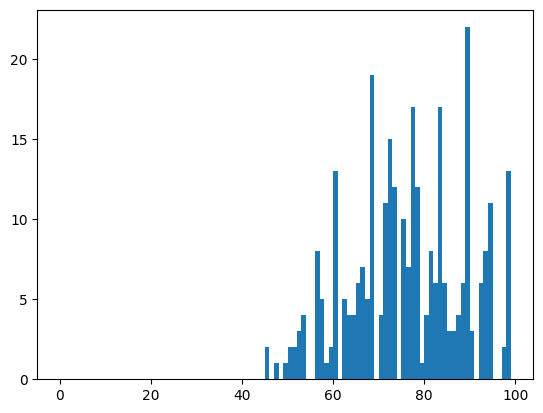

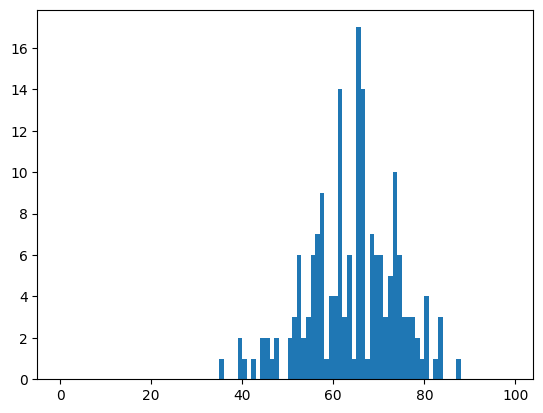

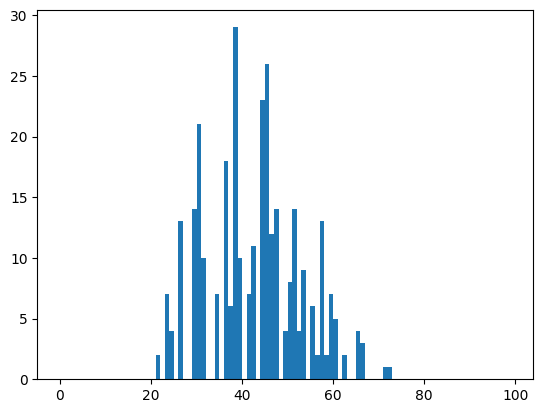

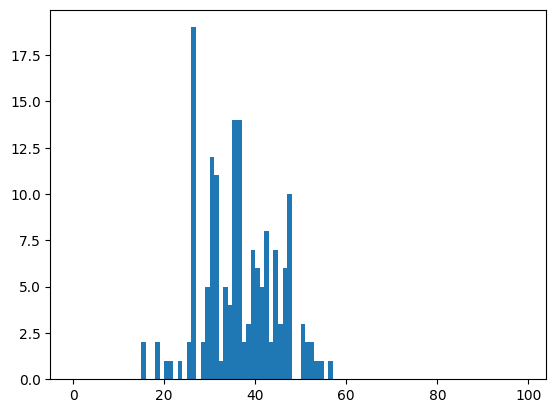

In [7]:
plt.figure()
plt.hist(coins_gained_per_trial_19,np.arange(100))

plt.figure()
plt.hist(coins_gained_per_trial_20,np.arange(100))

plt.figure()
plt.hist(coins_gained_per_trial_21,np.arange(100))

plt.figure()
plt.hist(coins_gained_per_trial_22,np.arange(100))

In [8]:
# a seguire faccio il t-test

import scipy.stats as stats

# t-test delle condizioni in cui la batteria è lunga
t_stat, p_value = stats.ttest_ind(coins_gained_per_trial_19, coins_gained_per_trial_20)
print("t-test a campioni indipendenti sulle condizioni con la batteria lunga:", t_stat, p_value)

alpha = 0.05
if p_value < alpha:
    print("Differenza significativa")
else:
    print("Nessuna differenza significativa")



# t-test delle condizioni in cui la batteria è corta
t_stat, p_value = stats.ttest_ind(coins_gained_per_trial_21, coins_gained_per_trial_22)
print("t-test a campioni indipendenti sulle condizioni con la batteria corta:", t_stat, p_value)

alpha = 0.05
if p_value < alpha:
    print("Differenza significativa")
else:
    print("Nessuna differenza significativa")

t-test a campioni indipendenti sulle condizioni con la batteria lunga: 11.464449375249556 4.046356603680079e-27
Differenza significativa
t-test a campioni indipendenti sulle condizioni con la batteria corta: 6.552899573013016 1.4523561906453554e-10
Differenza significativa


In [9]:
import scipy.stats as stats


statistic, p_value = stats.mannwhitneyu(coins_gained_per_trial_19, coins_gained_per_trial_20)
print("t-test non parametrico (Wilconxon-Mann-Whitney) sulle condizioni con la batteria lunga:", statistic, p_value)

alpha = 0.05
if p_value < alpha:
    print("Differenza significativa")
else:
    print("Nessuna differenza significativa")



statistic, p_value = stats.mannwhitneyu(coins_gained_per_trial_21, coins_gained_per_trial_22)
print("t-test non parametrico (Wilconxon-Mann-Whitney) sulle condizioni con la batteria corta:", statistic, p_value)

alpha = 0.05
if p_value < alpha:
    print("Differenza significativa")
else:
    print("Nessuna differenza significativa")

t-test non parametrico (Wilconxon-Mann-Whitney) sulle condizioni con la batteria lunga: 43538.5 1.3452510533402372e-24
Differenza significativa
t-test non parametrico (Wilconxon-Mann-Whitney) sulle condizioni con la batteria corta: 35125.0 1.4950123640101048e-09
Differenza significativa


In [10]:
results = []
statistic, p_value = stats.mannwhitneyu(coins_gained_per_trial_19, coins_gained_per_trial_20)
results.append(["Long battery conditions", statistic, p_value,"Significant difference" if p_value < 0.05 else "Non significant difference"])

statistic, p_value = stats.mannwhitneyu(coins_gained_per_trial_21, coins_gained_per_trial_22)
results.append(["Short battery conditions", statistic, p_value,"Significant difference" if p_value < 0.05 else "Non significant difference"])

# Create a DataFrame to store the results
columns = ["Test", "Statistic", "P-Value", "Significance"]
results_df = pd.DataFrame(results, columns=columns)

# Save the results to a CSV file
results_df.to_csv('CoinsGainedPerTrial_mannwhitneyresults.csv', index=False)

print("Results saved to 'CoinsGainedPerTrial_mannwhitneyresults.csv'.")

Results saved to 'CoinsGainedPerTrial_mannwhitneyresults.csv'.


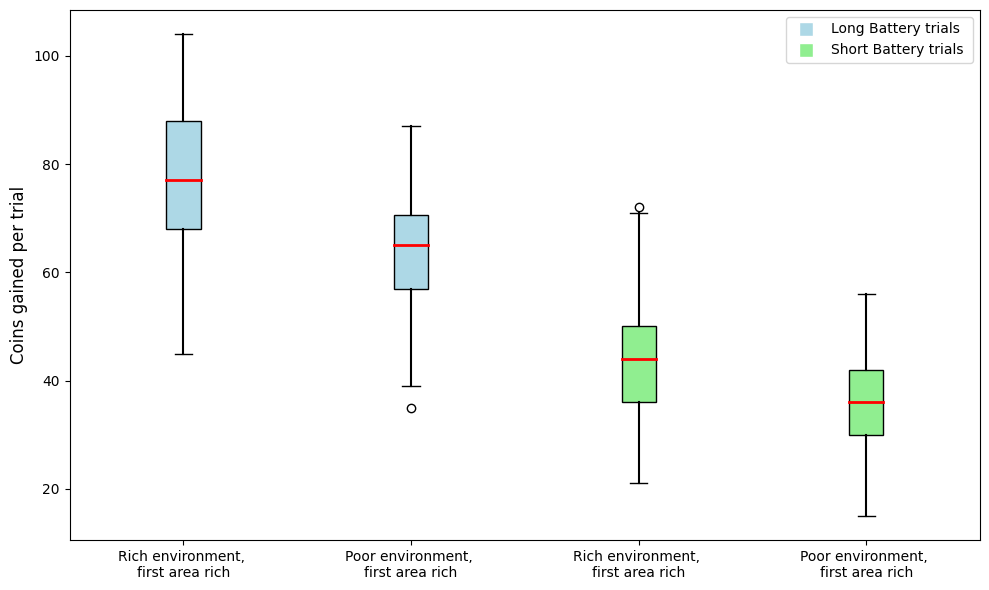

In [15]:
import matplotlib.pyplot as plt

data_long_battery = [coins_gained_per_trial_19, coins_gained_per_trial_20]
data_short_battery = [coins_gained_per_trial_21, coins_gained_per_trial_22]

# Combine data for Long Battery and Short Battery
data = data_long_battery + data_short_battery

# Create a single subplot
fig, ax = plt.subplots(figsize=(10, 6))

# Box plot for Long Battery in blue
box_long_battery = ax.boxplot(data_long_battery, positions=[1, 2],
                              labels=[
                                "Rich environment, \nfirst area rich",
                                "Poor environment, \nfirst area rich",
                              ], patch_artist=True)

# Customize the box plot for Long Battery
colors_long_battery = ['lightblue', 'lightblue']
for patch, color in zip(box_long_battery['boxes'], colors_long_battery):
    patch.set_facecolor(color)
    patch.set_edgecolor('black')
for whisker in box_long_battery['whiskers']:
    whisker.set(color='black', linestyle='-', linewidth=1.5)
for median in box_long_battery['medians']:
    median.set(color='red', linewidth=2)

# Box plot for Short Battery in green
box_short_battery = ax.boxplot(data_short_battery, positions=[3, 4],
                               labels=[
                                "Rich environment, \nfirst area rich",
                                "Poor environment, \nfirst area rich",
                               ], patch_artist=True)

# Customize the box plot for Short Battery
colors_short_battery = ['lightgreen', 'lightgreen']
for patch, color in zip(box_short_battery['boxes'], colors_short_battery):
    patch.set_facecolor(color)
    patch.set_edgecolor('black')
for whisker in box_short_battery['whiskers']:
    whisker.set(color='black', linestyle='-', linewidth=1.5)
for median in box_short_battery['medians']:
    median.set(color='red', linewidth=2)

# Set title and labels
ax.set_ylabel('Coins gained per trial', fontsize=12)
ax.tick_params(axis='both', labelsize=10)

# Add legend
legend_labels = ['Long Battery trials ', 'Short Battery trials ']
legend_handles = [plt.Line2D([0], [0], marker='s', color='w', markerfacecolor=color, markersize=10) for color in
                  ['lightblue', 'lightgreen']]

ax.legend(legend_handles, legend_labels, loc='upper right')

# Tight layout
plt.tight_layout()
plt.show()
